In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import math
from __future__ import division
import warnings
warnings.filterwarnings("ignore")

# turn of data table rendering
pd.set_option('display.notebook_repr_html', False)

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
print(np.version.full_version, scipy.version.full_version, pd.__version__, sm.version.full_version)

1.19.5 1.1.0 0.23.0 0.9.0


## Baseball data
We use baseball stats data from the [Lahman’s Baseball Database](http://www.seanlahman.com/baseball-archive/statistics) as provided by the Udacity course [Intro to Data Science](https://www.udacity.com/course/ud359).

In [6]:
# Load the stats data from a csv file
df = pd.read_csv('data/baseball_stats.csv')
df.head()

             name handedness  height  weight    avg   HR
0       Tom Brown          R      73     170  0.000    0
1  Denny Lemaster          R      73     182  0.130    4
2       Joe Nolan          L      71     175  0.263   27
3     Denny Doyle          L      69     175  0.250   16
4   Jose Cardenal          R      70     150  0.275  138

## Question and hypothesis
We want to know if there is a statistical significant difference in the career batting average between left-handed and right-handed players. We choose an alpha level of 5% as the significance level. We test against the hypothesis below:

|Hypothesis||$\alpha = .05$|
|---:|:---:|---|:---|
|$H_0:$|$\mu_{R} = \mu_{L}$|There is no significant difference between left and right handedness|
|$H_a:$|$\mu_{R} \neq \mu_{L}$|There is a significant difference between left and right handedness|

## Some data wrangling

In [7]:
# Get the appropriate samples from the dataframe
# Filter out the batting averages of 0.0 (pitchers assumed)
left_handed_avg  = df[(df['handedness'] == 'L') & (df['avg'] != 0)]['avg']
right_handed_avg = df[(df['handedness'] == 'R') & (df['avg'] != 0)]['avg']

left_handed_avg.count(), right_handed_avg.count()

(256, 546)

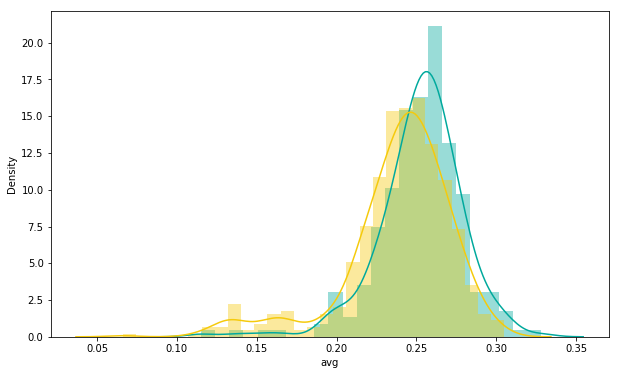

In [9]:
# Plot the distributions
plt.figure(figsize=(10,6))
sns.distplot(left_handed_avg)
sns.distplot(right_handed_avg)
plt.show()

## Welch's t-Test
This t-test is a more generic hypothesis test for independent samples, based on Student's t-test. The difference with the Student's t-test is that we account for sample size and variance differences. If we set equal_var to False in the scipy stats ttest_ind, the function performs the Welch's t-test instead of the Student's t-test. The following formula applies:

$$t=\frac{(\bar{x}_a-\bar{x}_b)-(\mu_a-\mu_b)}{\sqrt{\frac{s_a^2}{n_a}+\frac{s_b^2}{n_b}}}$$


Note that the variance of $a$ and $b$ are used, not the pooled variance.

In [10]:
# Perform Welch's t-test (equal_var=False)
t, p = stats.ttest_ind(left_handed_avg, right_handed_avg, equal_var=False)
t, p

(6.322968049326536, 4.87414820898943e-10)

This function assumes we want to perform a two-sided t-test. For a one-sided t-test use $\frac{1}{2}p$ since it is only true for one side of the distribution.

## Hypothesis testing

In [11]:
# Test if we can reject the null hypothesis
alpha = .05
p < alpha

True

There seems to be a statistical significant difference between left and right handed players. We are 95% confident that the difference is not due to random chance.